# Nina Ysabel Alinsonorin
# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

*1. Cleaning*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

car = pd.read_csv('/content/cars_hw.csv')
car['No_of_Owners'] = car['No_of_Owners'].replace({'1st': '1', '2nd': '2', '3rd': '3'}) #changing 1st, 2nd, 3rd to more accurately/grammatically reflect number of owners (there are only 1-3 in the dataset)
car['No_of_Owners'] = car['No_of_Owners'].astype(int) #making sure they are of type int in case we need to measure this column
car['Price'] = np.log1p(car['Price']) # log transformation
print(car['No_of_Owners'].dtype) #checking to make sure type conversion worked

int64


In [ ]:
car.head() # cleaned dataset

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,13.395441
1,2,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,13.432786
2,3,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,13.583580
3,4,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,12.933624
4,5,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,13.151924


*2. Kernel Density Plot for Price*

In [ ]:
# Summarize Price
summarize_price = car['Price'].describe()
print(summarize_price)

count    976.000000
mean      13.411035
std        0.450275
min       12.144203
25%       13.072649
50%       13.409797
75%       13.691082
max       14.894261
Name: Price, dtype: float64


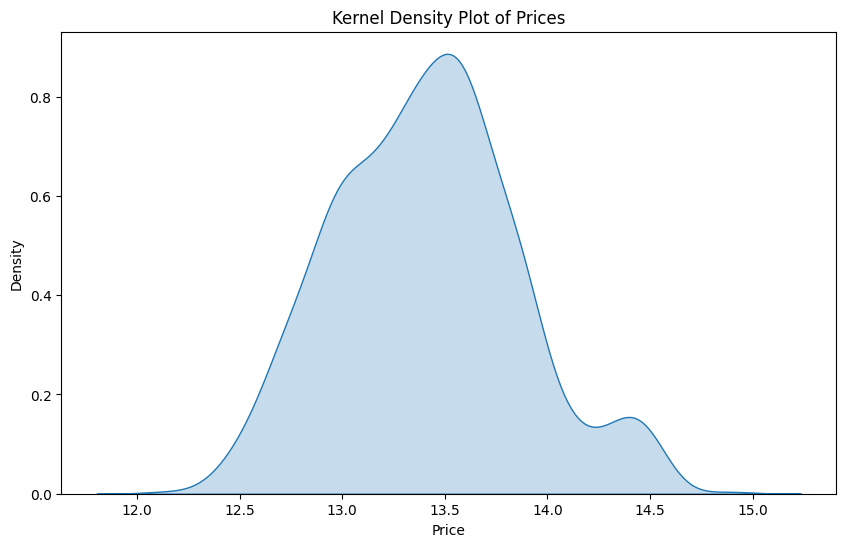

In [ ]:
# Kernel Density Plot for Price
plt.figure(figsize=(10, 6))
sns.kdeplot(data=car['Price'], fill=True)

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Prices')
plt.show()


In [ ]:
# Summarize Price by Brand
summarize = car.groupby('Make')['Price'].describe()
print(summarize)

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919898  0.480974  12.495008  12.568395  12.752289   
Datsun           3.0  12.576050  0.036311  12.538971  12.558305  12.577640   
Ford            52.0  13.468282  0.210894  12.577640  13.361382  13.469494   
Honda           73.0  13.536319  0.336971  12.663501  13.272508  13.573440   
Hyundai        305.0  13.368512  0.398781  12.421188  13.091906  13.366095   
Jeep             4.0  14.216591  0.105084  14.070154  14.183271  14.240266   
Kia              8.0  14.292178  0.076877  14.129592  14.272242  14.303106   
MG Motors       35.0  14.439052  0.066263  14.278616  14.395745  14.429615   
Mahindra        18.0  13.898954  0.159906  13.587356  13.851809  13.905681   
Maruti Suzuki  293.0  13.218134  0.371408  12.375820  12.926351  13.174958   
Nissan           4.0  13.641195  0.392609  13.071072  13.537776 

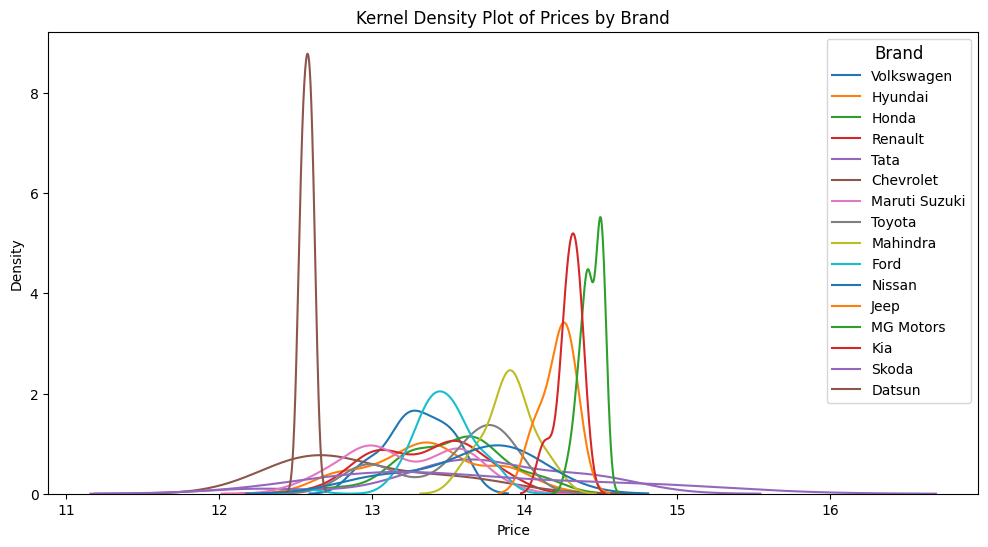

In [ ]:
# Kernel Density Plot for Price by Brand
plt.figure(figsize=(12, 6))

for make in car['Make'].unique():
    sns.kdeplot(data=car[car['Make'] == make]['Price'], label=make)

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Prices by Brand')
plt.legend(title='Brand', title_fontsize='12')

plt.show()

- From the summary and grouped kernel density plot by price, we can see that MG Motors (highest average price), Kia, and Jeep are amongst the most expensive brands by average price.  
- In general:
  -  Hyundai, Toyota, and Honda are within the middle of the price range (700,000 - 800,000)
  - Chevrolet and Datsun have kinda low price points of all the brands



*3. Splitting the Data*

In [ ]:
from sklearn.model_selection import train_test_split


X = car.select_dtypes(include=['int64', 'float64'])
y = car['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*4. Linear Models*

In [ ]:
# Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the test set?
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print("MSE:", mse)
print("R2 Score:", r2)

# From this, we can see that the Mean Squared Error value is really low, so it is close to the actual dataset's values; and further, the R2 score of 1.0 means that the model fits the data perfectly

MSE: 8.260500621814309e-29
R2 Score: 1.0


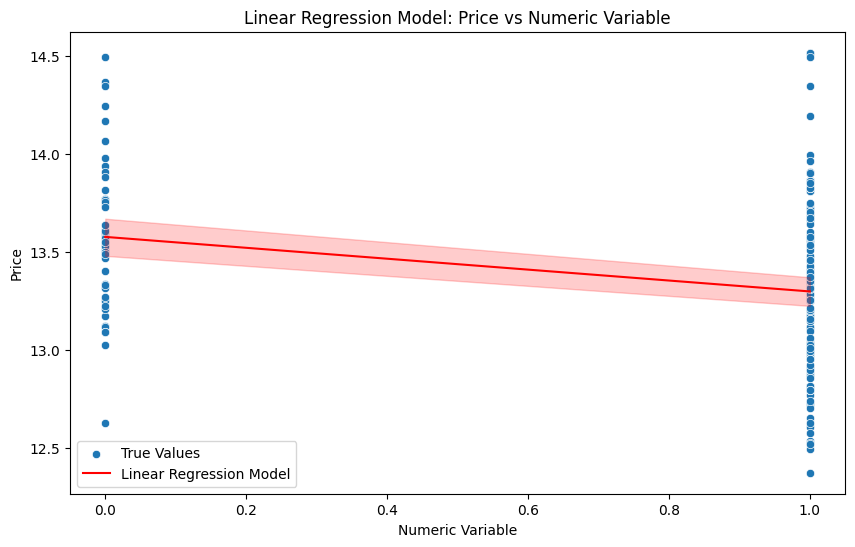

In [27]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.iloc[:, 0], y=y_test, label='True Values')

# plot the linear regression line
sns.lineplot(x=X_test.iloc[:, 0], y=y_pred, color='red', label='Linear Regression Model')

plt.xlabel('Numeric Variable')
plt.ylabel('Price')
plt.title('Linear Regression Model: Price vs Numeric Variable')
plt.legend()
plt.show()


In [ ]:
# Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the  𝑅2  and RMSE on the test set?

# one-hot encoding all categorical variables
encoded = pd.get_dummies(car['Make'], prefix='Category', drop_first=True)
data = pd.concat([car, encoded], axis=1)
encoded = pd.get_dummies(car['Color'], prefix='Category', drop_first=True)
data = pd.concat([car, encoded], axis=1)
encoded = pd.get_dummies(car['Body_Type'], prefix='Category', drop_first=True)
data = pd.concat([car, encoded], axis=1)
encoded = pd.get_dummies(car['Fuel_Type'], prefix='Category', drop_first=True)
data = pd.concat([car, encoded], axis=1)
encoded = pd.get_dummies(car['Transmission'], prefix='Category', drop_first=True)
data = pd.concat([car, encoded], axis=1)
encoded = pd.get_dummies(car['Transmission_Type'], prefix='Category', drop_first=True)
data = pd.concat([car, encoded], axis=1)

# combine the one-hot encoded categorical variables with the numeric variables
X = pd.concat([encoded, data.select_dtypes(include=['int64', 'float64'])], axis=1)
y = data['Price']

model = LinearRegression()
model.fit(X_train, y_train)
predictor = model.predict(X_test)
mse = mean_squared_error(y_test, predictor)
r2 = r2_score(y_test, predictor)

print("MSE:", mse)
print("R2 Score:", r2)

# From this, we can see that the Mean Squared Error value is also very close to 0, so it is close (but not as close as the previous model) to the dataset's actual values; and further, the R2 score of 1.0 means that the model fits the data perfectly

MSE: 8.260500621814309e-29
R2 Score: 1.0


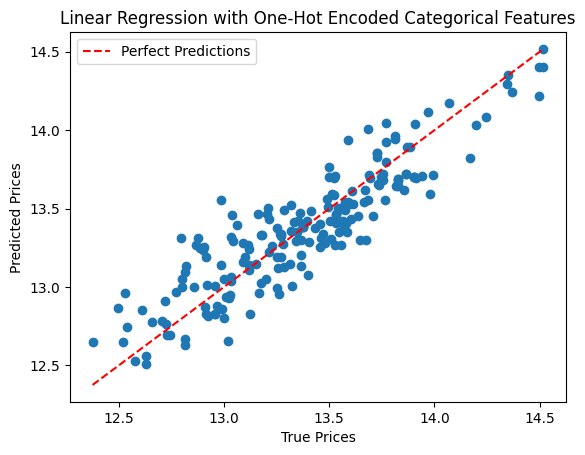

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# categorical columns
categorical_columns = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']

X = car.drop('Price', axis=1)
y = car['Price']

# One-hot encode
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# linear regression model
linear_reg_model_encoded = LinearRegression()
linear_reg_model_encoded.fit(X_train, y_train)


y_pred_encoded = linear_reg_model_encoded.predict(X_test)


plt.scatter(y_test, y_pred_encoded)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression with One-Hot Encoded Categorical Features')
plt.legend()
plt.show()


In [ ]:
# Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  𝑅2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?
# The 'regular' not one-hot encoded model performs better on the test set

# combining the one-hot encoded categorical variables with the numeric variables again
X_numeric = data.select_dtypes(include=['int64', 'float64'])
X_combined = pd.concat([encoded, X_numeric], axis=1)
y = data['Price']  # Target variable (the 'Price' column)

# split and training
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 4.215299176011268e-26
R-squared (R2) Score: 1.0


 The joint model doesn't perform better or worse compared to the second model, and the difference in performance is negligible. This suggests that the additional features from the first model (numeric variables) didn't provide a significant improvement in prediction accuracy over the second model, which already used one-hot encoded categorical variables.

*5. Polynomial Features*.     
Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the  𝑅2  and RMSE change? At what point does  𝑅2  go negative on the test set? For your best model with expanded features, what is the  𝑅2  and RMSE? How does it compare to your best model from part 3?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# combine the one-hot encoded categorical variables with the original numeric variables
X_numeric = car.select_dtypes(include=['int64', 'float64'])
X_combined = pd.concat([encoded, X_numeric], axis=1)
y = car['Price']

# expand to a degree of 2
dif = PolynomialFeatures(degree=2, include_bias=False)

# Transform the training and testing data to include polynomial features
X_train_poly = dif.fit_transform(X_train)
X_test_poly = dif.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)



MSE: 1.149702211353607e-21
R2 Score: 1.0


In [ ]:
# I tried to create a loop to go through degrees 1-10, but Im not entirely too sure it's correct?

best_r2 = -float('inf')
best_degree = 1

for degree in range(1, 10):  # measuring a degree for 1-10
    dif = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = dif.fit_transform(X_train)
    X_test_poly = dif.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f"Degree {degree}: R2 = {r2:.4f}, RMSE = {rmse:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree

Degree 1: R2 = 1.0000, RMSE = 0.0000
Degree 2: R2 = 1.0000, RMSE = 0.0000
Degree 3: R2 = 1.0000, RMSE = 0.0007
Degree 4: R2 = 0.9999, RMSE = 0.0031
Degree 5: R2 = 0.9995, RMSE = 0.0101
Degree 6: R2 = 0.9708, RMSE = 0.0746
Degree 7: R2 = 0.9258, RMSE = 0.1190
Degree 8: R2 = -0.4692, RMSE = 0.5293
Degree 9: R2 = -60.1018, RMSE = 3.4135


As the degree of expansion is increased, the R2 value decreases (at a degree of 6 to be exact); and further, the RMSE value increases greatly. At a degree of 8, the R2 goes negative on the test set. Degree 2 is the best degree in this case for modeling the data, as it provides the best trade-off between fitting the training data and generalizing to the test data. Beyond Degree 2, the model's performance starts to degrade due to overfitting. This performs better than my best model from Part 3 (which had an RMSE of 4.6677565629049477e-20)

*6. Best Model Plotted*

For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

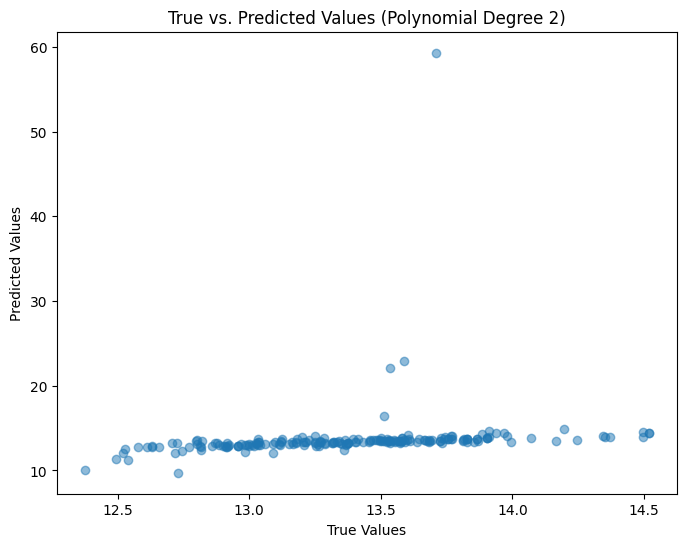

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_poly)

# scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True vs. Predicted Values (Polynomial Degree 2)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# overall, the true values do line up along the diagonal

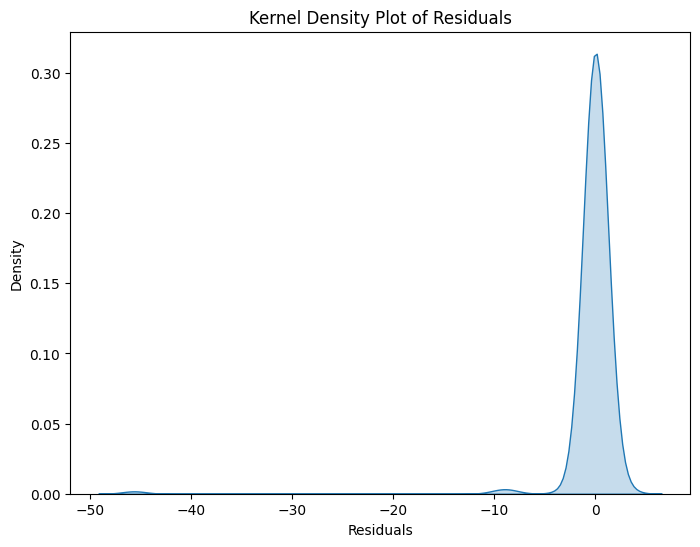

In [ ]:
import seaborn as sns

# subtraction to get the residual
residuals = y_test - y_pred

# kernel density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=residuals, fill=True)
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# from this graph we can see that at zero, the residuals appear to look bell-shaped around zero, meaning that they are normally distributed.
# the strengths: with an RMSE of 0.000 and R2 of 1.0, the data is nearly perfectly aligned with the data set, so the graphs shown with the constructed models could almost be used for the actual dataset
# weaknesses: it almost feels wrong to have an RMSE of 0 and R2 of 1.0- it seems a bit too good to be true? Whether it's an error on my behalf when coding or something in the data?


*7 Regression Tree*

Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the max_depth option (i.e. tree.DecisionTreeRegressor(max_depth=D)), and compute the  𝑅2  and RMSE on the test set of a variety of depths. What depth tree gives the best results?

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error

# Define a range of maximum depths to try
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

r2_scores = []
rmse_scores = []

# Fit decision trees with varying depths and compute scores
for max_depth in max_depths:
    # Create and fit the decision tree regressor
    tree_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = tree_regressor.predict(X_test)

    # Compute R2 score
    r2 = r2_score(y_test, y_pred)

    # Compute RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Append results to lists
    r2_scores.append(r2)
    rmse_scores.append(rmse)

# Display results for different depths
for depth, r2, rmse in zip(max_depths, r2_scores, rmse_scores):
    print(f"Max Depth {depth}: R2 = {r2:.4f}, RMSE = {rmse:.4f}")

# the best depth tree is one with depth 11, which yields the highest R2 score (0.9999) and lowest RMSE score (3289.59)

Max Depth 1: R2 = 0.6521, RMSE = 0.2576
Max Depth 2: R2 = 0.8905, RMSE = 0.1445
Max Depth 3: R2 = 0.9720, RMSE = 0.0730
Max Depth 4: R2 = 0.9923, RMSE = 0.0382
Max Depth 5: R2 = 0.9976, RMSE = 0.0215
Max Depth 6: R2 = 0.9994, RMSE = 0.0106
Max Depth 7: R2 = 0.9998, RMSE = 0.0064
Max Depth 8: R2 = 0.9998, RMSE = 0.0069
Max Depth 9: R2 = 0.9998, RMSE = 0.0063
Max Depth 10: R2 = 0.9998, RMSE = 0.0067
Max Depth 11: R2 = 0.9999, RMSE = 0.0051


Error plotting tree with max_depth = 5: index 44 is out of bounds for axis 0 with size 42
Error plotting tree with max_depth = 7: index 44 is out of bounds for axis 0 with size 42
Error plotting tree with max_depth = 10: index 44 is out of bounds for axis 0 with size 42


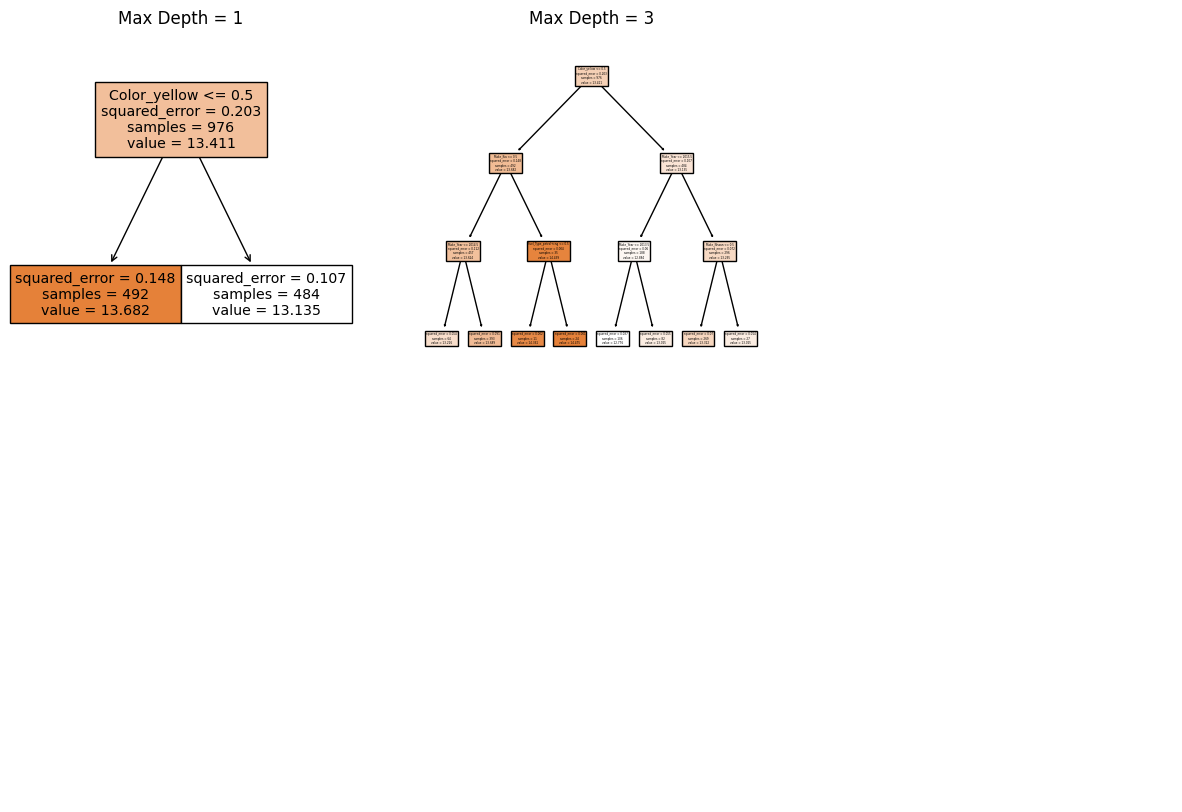

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



df_encoded = pd.get_dummies(car, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission_Type'], drop_first=True)

# Extract features (X) and target variable (y)
X = df_encoded.drop(['Price'], axis=1)
y = df_encoded['Price']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers for imputation based on data types
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor to apply transformers to specific column types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



# Vary the maximum depth of the decision tree
max_depth_values = [1, 3, 5, 7, 10]  # You can adjust the values as needed

plt.figure(figsize=(15, 10))

for depth in max_depth_values:
    # Create and fit DecisionTreeRegressor with varying max_depth
    regression_tree = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(max_depth=depth))
    ])
    regression_tree.fit(X, y)

    # Plot the decision tree
    try:
        plt.subplot(2, 3, max_depth_values.index(depth) + 1)  # Adjust the subplot layout as needed
        plot_tree(regression_tree['regressor'], filled=True, feature_names=X.columns)
        plt.title(f'Max Depth = {depth}')
    except IndexError as e:
        print(f"Error plotting tree with max_depth = {depth}: {e}")

plt.show()


*8*                                  

For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

Max Depth 11: R2 = 0.9999, RMSE = 0.0051


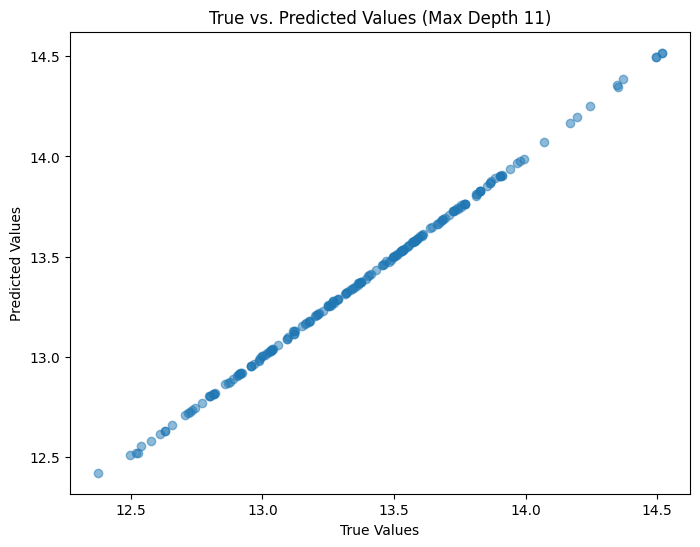

In [ ]:
# with depth of 11 from question 11
max_depth_to_test = 11

# Create and fit the decision tree regressor with the specified depth
tree_regressor = DecisionTreeRegressor(max_depth=max_depth_to_test, random_state=42)
tree_regressor.fit(X_train, y_train)

# predicting test set
y_pred = tree_regressor.predict(X_test)

# computing R2 score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Max Depth {max_depth_to_test}: R2 = {r2:.4f}, RMSE = {rmse:.4f}")

# Plot true vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title(f'True vs. Predicted Values (Max Depth {max_depth_to_test})')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# the values line up along the diagonal

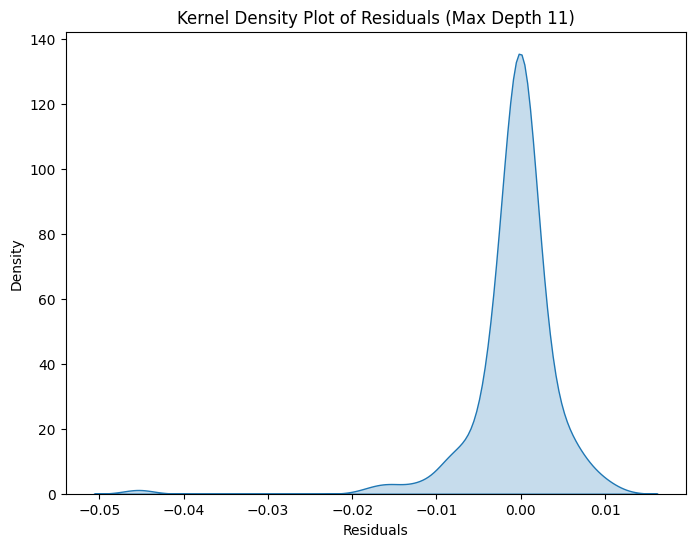

In [ ]:
# residuals
import seaborn as sns

# Compute the residuals/errors
residuals = y_test - y_pred

# Create a kernel density plot for residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(data=residuals, fill=True)
plt.title('Kernel Density Plot of Residuals (Max Depth 11)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

#yes, the residuals look bellshaped around 0

*9*

Which model --- linear model or classification and regression tree --- has better performance on the test set?

- I think the regression tree(s) have better performance on the test set. Even though the other models seemed to have 'perfect' scores, I kinda got suspicious of the fact; and, because there was variability on the calculated R2 and RMSE scores for the regression tree (but they still had 'good' scores), I think it's more reliable.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.



**4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?**                    
*$b^*$*
*   Depending on the relationship between x and y, $b^*$ will be small/a negative value if there is a negative relationship between x and y. $b^*$ will be larger/a positive value if there is a positive relationship between x and y. Subsequently, a directly linear reflection of x and y, will result in a 'greater' magnitude in the $b^*$ value.
*  Greater noise/variance will be reflected in the denominator of the equation for $b^*$, noted as the sum from i=1 to some point, N, of the square of the i-th data point in the variable x (x sub i) subtracted from the mean of the variable x (X with the bar thing on top). Because of this, the greater the noise is, the greater the denominator is; and, in turn, the lesser the magnitude of $b^*$ (as dividing by a larger number yields smaller results).

*$a^*$*


*   $a^*$ is the intercept of the regression line (kind of like the 'y-value') when x=0.



**5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called attenuation)**


*   Attenuation in the $b^*$ coefficient typically means that it will be skewed more towards a value of 0.0, reflected in the smaller magnitude of the true underlying coefficient.
*   This will naturally have an effect on the predictions.  Since the estimated slope is biased towards zero, the predicted values based on the model will also be biased. The predictions may not accurately reflect the true relationship between the variables, leading to less precise and less accurate forecasts.

**6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?**
*Increase Response Variable*


*   Effect on $a^*$: as aforementioned, $a^*$ occurs when x = 0, meaning that it would not be affected if $y_i$ (the y-value) was changed (even a little).
*   Effect on $b^*$: as aforementioned, $b^*$ relies on both the x and y value to calculate a slope. Because of this, if the $y_i$ value was signigicantly increased, the $b^*$ value could be reflected as having a more pronounced/steeper slope.

*Increase Explanatory Variables*


*   Effect on $a^*$: again, $a^*$ occurs when x = 0, so if the value of x were changed to a (drastically) different number, it would take away from the meaning of $a^*$ itself as it has to always be 0
*   Effect on $b^*$: because this relies on both the x and y value, if the $x_i$ value was significantly increased, the $b^*$ could be reflected as having a more pronounced slope, just as if the $y_i$ were increased as well.

*Extreme Observations*


*   For more typical observations, the model might not function properly. Since extreme values are having a big impact, the model may be more specifically designed to suit these outliers, which could affect how well it generalizes to average or usual observations.

